# Project 2: Database of baby names

# Name: Abhishek Kumar Sharma
# Student Id: 5037 2679
# Class: MTH 548
# Date: March 14, 2023

# Introduction

The United States Social Security Administration maintains records of babies born in the USA each year. Historical data about the first names of newborn babies each year is available on the Social Security website, where you can download two files: $$(1) \text{ names.zip – count of each baby name, summed across the U.S.}$$
       $$(2) \text{ namesbystate.zip - count of each baby name for each state in the U.S.}$$

Our objective is explore the data to gain novel insights.

## Importing Libraries

In [1]:
%pylab inline
import seaborn as sns
import pandas as pd
import zipfile
import requests
import csv
from zipfile import ZipFile

Populating the interactive namespace from numpy and matplotlib


### Downloading the Data

We start by downloading the data from the SSA website.

In [2]:
url = "https://www.ssa.gov/oact/babynames/names.zip"

with requests.get(url) as response:

    with open("names.zip", "wb") as temp_file:
        temp_file.write(response.content)

### Creading the pandas Dataframe from names.zip file

Since the data is contained in the zipfile, we start by unzipping the data and read each of the ".txt" files and save it in the data.csv file.

In [3]:
data_list = [["year", "name", "gender", "count"]]

In [4]:
with ZipFile("names.zip") as temp_zip: # Opening of ZipFile
    for file_name in temp_zip.namelist():
        if ".txt" in file_name: # Reading those file which ends with .txt
            with temp_zip.open(file_name) as temp_file:
                for line in temp_file.read().decode("utf-8").splitlines():
                    line_chunks = line.split(",")   # Splitting each line in the file into lists of strings.
                    year = file_name[3:7]    # Assigning year
                    name = line_chunks[0]    # Assigning name
                    gender = line_chunks[1]  # Assigning gender
                    count = line_chunks[2]   # Assigning count

                    data_list.append([year, name, gender, count])

csv.writer(open("data_name.csv", "w", newline="",
                encoding="utf-8")).writerows(data_list)

From the csv file we create our pandas DataFrame which contains the names of babies from the year 1880 to 2021.

In [5]:
df = pd.read_csv("data_name.csv")   # Creating DataFrame

In [6]:
df

,year,name,gender,count
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746
...,...,...,...,...
2052776,2021,Zyeire,M,5
2052777,2021,Zyel,M,5
2052778,2021,Zyian,M,5
2052779,2021,Zylar,M,5


In [7]:
df.head()  # Top 5 entries in the dataframe

,year,name,gender,count
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746


In [8]:
df.tail()    # Last 5 entries in the dataframe

,year,name,gender,count
2052776,2021,Zyeire,M,5
2052777,2021,Zyel,M,5
2052778,2021,Zyian,M,5
2052779,2021,Zylar,M,5
2052780,2021,Zyn,M,5


We divide the data into two parts. First dataframe conatins the male baby names and the second dataframe contains only female baby names. Our first aim is to identify the overall most famous male and female baby names.

### Most popular Male name

In [9]:
male_names = df[df["gender"] == "M"]   # Dataframe with male names
female_names = df[df["gender"] == "F"]  # Dataframe with female names

In [10]:
male_names[male_names["count"] == male_names["count"].max()]    # Finding the names with most count

,year,name,gender,count
437168,1947,James,M,94762


Therefore, James is the most popular name for a male. The name was most popular in 1947.

In [11]:
male_names[male_names["name"] == "James"]

,year,name,gender,count
944,1880,James,M,5927
2940,1881,James,M,5441
4964,1882,James,M,5892
7117,1883,James,M,5223
9319,1884,James,M,5693
...,...,...,...,...
1911286,2017,James,M,14337
1943640,2018,James,M,13613
1975695,2019,James,M,13157
2007243,2020,James,M,12343


Lets look at how the popularity of the name changes with time.

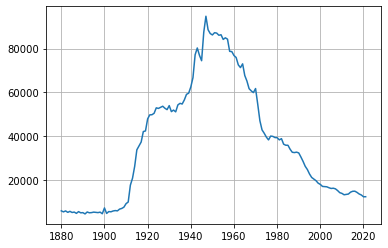

In [12]:
plt.plot(range(1880, 2022) , male_names[male_names["name"] == "James"]["count"]);
plt.grid()

James is the most popular name in the dataset. The popularity of the name reaches its peak in 1947. After that there is continious decline in the popularity of the name.

### Most popular Female name

In [13]:
female_names[female_names["count"] == female_names["count"].max()]   # Finding the female name with most count

,year,name,gender,count
431064,1947,Linda,F,99693


Therefore, Linda is the most popular name for a female. The name was most popular in 2012 and most number of female babies are named Linda in 1947.

In [14]:
female_names[female_names["name"] == "Linda"]

,year,name,gender,count
304,1880,Linda,F,27
2264,1881,Linda,F,38
4228,1882,Linda,F,36
6317,1883,Linda,F,49
8489,1884,Linda,F,33
...,...,...,...,...
1893580,2017,Linda,F,406
1926241,2018,Linda,F,395
1958490,2019,Linda,F,359
1990607,2020,Linda,F,332


Lets look at how the popularity of the name changes with time.

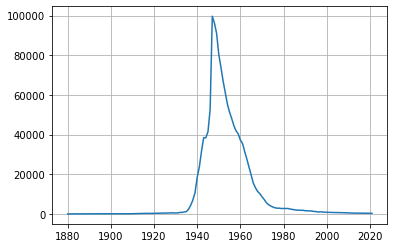

In [15]:
plt.plot(range(1880, 2022) , female_names[female_names["name"] == "Linda"]["count"]);
plt.grid()

Linda was not a popular as a name until 1930s. Then its popularity shoots up and reached its peak in 1947 and again its popularity died down after 1970s.

Let us consider the overall popularity of the male names.

## Diversity of Names

In [16]:
df = pd.read_csv("data_name.csv")

In [17]:
df

,year,name,gender,count
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746
...,...,...,...,...
2052776,2021,Zyeire,M,5
2052777,2021,Zyel,M,5
2052778,2021,Zyian,M,5
2052779,2021,Zylar,M,5


In [18]:
len(df["name"].unique())

101338

We create a pivot table which conatins the data about how many babies had a given name for each year.

In [19]:
new_df = df.pivot_table(index="name", columns="year", values="count", aggfunc=np.sum).fillna(0)
new_df

year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
name,,,,,,,,,,,,,,,,,,,,,
Aaban,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.0,14.0,16.0,15.0,9.0,11.0,7.0,6.0,0.0,0.0
Aabha,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,9.0,7.0,7.0,0.0,0.0,6.0,5.0,5.0
Aabid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,0.0,6.0,0.0,0.0,0.0
Aabidah,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
Aabir,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zyvion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zyvon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
Zyyanna,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### How many names were used each year?

In [20]:
unique_names = new_df.astype(bool).sum()
unique_names

year
1880     1889
1881     1829
1882     2012
1883     1962
1884     2158
        ...  
2017    30054
2018    29637
2019    29456
2020    28766
2021    28801
Length: 142, dtype: int64

#### How many babies shared the same name on average by year? 

In [21]:
percentage = (new_df/new_df.sum())*100 
percentage

year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
name,,,,,,,,,,,,,,,,,,,,,
Aaban,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000301,0.000384,0.000432,0.000406,0.000246,0.000308,0.000200,0.000173,0.00000,0.000000
Aabha,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000137,0.000000,0.000243,0.000189,0.000191,0.000000,0.000000,0.000173,0.00015,0.000149
Aabid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000136,0.000000,0.000171,0.000000,0.00000,0.000000
Aabidah,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000143,0.000000,0.00000,0.000000
Aabir,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000136,0.000000,0.000143,0.000000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zyvion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
Zyvon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000189,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
Zyyanna,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000


####  How did this change over the years?

We will look at the top 10 names in the list and see how the average changes over the years

In [22]:
percentage["total"] = percentage.sum(axis = 1)
sort_percentage = percentage.sort_values(by = "total", ascending = False).drop("total", axis = 1)[:10]

In [23]:
sort_percentage

year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
name,,,,,,,,,,,,,,,,,,,,,
Mary,3.519882,3.605792,3.691549,3.707869,3.800609,3.805625,3.885758,4.015878,3.941591,4.045393,...,0.070787,0.073056,0.071298,0.071280,0.068834,0.067671,0.067120,0.064308,0.066568,0.061879
John,4.814774,4.564326,4.332086,4.118113,3.872489,3.654081,3.554013,3.300821,3.105121,2.976335,...,0.291163,0.294749,0.289189,0.281685,0.274353,0.266649,0.262009,0.255529,0.247790,0.242133
James,2.952592,2.836162,2.667774,2.419057,2.351917,2.159399,2.108751,1.934978,1.872289,1.746347,...,0.368571,0.373653,0.391301,0.402766,0.408282,0.403727,0.389266,0.382066,0.372932,0.369908
William,4.745786,4.439255,4.211111,3.884413,3.668349,3.353484,3.245769,3.037273,2.920798,2.705696,...,0.462917,0.457581,0.455307,0.431278,0.431509,0.421037,0.417083,0.393824,0.379483,0.360239
Robert,1.204562,1.115263,1.133917,1.080924,1.016590,0.968637,0.963116,0.862191,0.945995,0.874558,...,0.190579,0.184630,0.179784,0.165905,0.163624,0.155592,0.147492,0.139855,0.131513,0.130958
Michael,0.175696,0.154653,0.144899,0.141511,0.153207,0.153620,0.136301,0.139050,0.155607,0.130474,...,0.443818,0.427244,0.418902,0.392162,0.386065,0.356111,0.334316,0.306433,0.294733,0.269711
Charles,2.659765,2.414759,2.308460,2.232834,1.980194,1.919420,1.784057,1.642730,1.542376,1.462903,...,0.190251,0.193196,0.198986,0.194958,0.194793,0.201499,0.189845,0.184547,0.187413,0.177070
David,0.431300,0.389226,0.378273,0.341102,0.312576,0.297691,0.263986,0.275675,0.267470,0.261987,...,0.343891,0.340131,0.330752,0.320070,0.304294,0.286424,0.279252,0.258880,0.247549,0.233625
Joseph,1.311270,1.279776,1.207946,1.167121,1.115579,1.060393,1.019125,0.998007,1.005433,0.946890,...,0.344629,0.337221,0.327862,0.311765,0.299136,0.293538,0.275462,0.264081,0.253620,0.240229


In [24]:
new_percentage = sort_percentage.transpose()
new_percentage

name,Mary,John,James,William,Robert,Michael,Charles,David,Joseph,George
year,,,,,,,,,,
1880,3.519882,4.814774,2.952592,4.745786,1.204562,0.175696,2.659765,0.431300,1.311270,2.557027
1881,3.605792,4.564326,2.836162,4.439255,1.115263,0.154653,2.414759,0.389226,1.279776,2.436037
1882,3.691549,4.332086,2.667774,4.211111,1.133917,0.144899,2.308460,0.378273,1.207946,2.358565
1883,3.707869,4.118113,2.419057,3.884413,1.080924,0.141511,2.232834,0.341102,1.167121,2.193193
1884,3.800609,3.872489,2.351917,3.668349,1.016590,0.153207,1.980194,0.312576,1.115579,2.054128
...,...,...,...,...,...,...,...,...,...,...
2017,0.067671,0.266649,0.403727,0.421037,0.155592,0.356111,0.201499,0.286424,0.293538,0.088678
2018,0.067120,0.262009,0.389266,0.417083,0.147492,0.334316,0.189845,0.279252,0.275462,0.087697
2019,0.064308,0.255529,0.382066,0.393824,0.139855,0.306433,0.184547,0.258880,0.264081,0.092274


Now we plot the average of the top 10 names

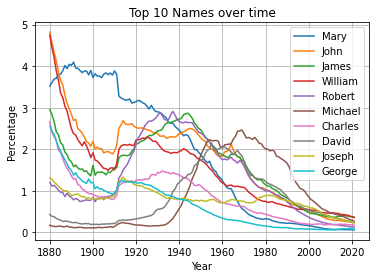

In [25]:
for name in new_percentage.columns.tolist():
    plt.plot(new_percentage.index, new_percentage[name], label=name)
plt.legend()
plt.grid()
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.title("Top 10 Names over time")
plt.show()

####  How does this differ depending on the gender of babies?

##### For the top 10 male baby names

In [26]:
male_names = df[df["gender"] == "M"]

We plot the data for top 10 male baby names by year.

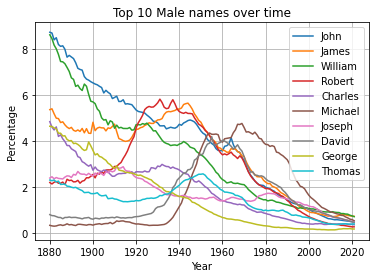

In [27]:
new_df = male_names.pivot_table(index="name", columns="year", values="count", aggfunc=np.sum).fillna(0)
percentage = (new_df/new_df.sum())*100 
percentage["total"] = percentage.sum(axis = 1)
sort_percentage = percentage.sort_values(by = "total", ascending = False).drop("total", axis = 1)[:10]
new_percentage = sort_percentage.transpose()
for name in new_percentage.columns.tolist():
    plt.plot(new_percentage.index, new_percentage[name], label=name)
plt.legend()
plt.grid()
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.title("Top 10 Male names over time")
plt.show()

We plot the data for top 10 female baby names by year.

##### For the top 10 female baby names

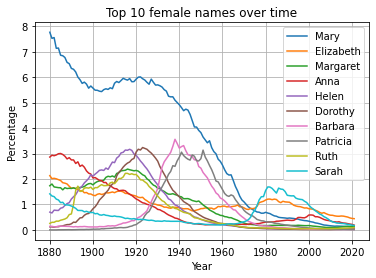

In [28]:
female_names = df[df["gender"] == "F"]
new_df = female_names.pivot_table(index="name", columns="year", values="count", aggfunc=np.sum).fillna(0)
percentage = (new_df/new_df.sum())*100 
percentage["total"] = percentage.sum(axis = 1)
sort_percentage = percentage.sort_values(by = "total", ascending = False).drop("total", axis = 1)[:10]
new_percentage = sort_percentage.transpose()
for name in new_percentage.columns.tolist():
    plt.plot(new_percentage.index, new_percentage[name], label=name)
plt.legend()
plt.grid()
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.title("Top 10 female names over time")
plt.show()

## Analysis of state baby data

Now we analyse the data namesbystate file.

#### Downloading State Baby Data

In [29]:
data_list = [["state", "sex", "year", "name", "count"]]
with ZipFile("namesbystate.zip") as temp_zip:
    for file_name in temp_zip.namelist():
        if ".TXT" in file_name:
            with temp_zip.open(file_name) as temp_file:
                for line in temp_file.read().decode("utf-8").splitlines():
                    line_chunks = line.split(",")
                    state = line_chunks[0]
                    year = line_chunks[2]
                    name = line_chunks[3]
                    sex = line_chunks[1]
                    count = line_chunks[4]

                    data_list.append([state, sex, year, name, count])

# We save the data list into a csv file.
csv.writer(open("data.csv", "w", newline="",
                encoding="utf-8")).writerows(data_list)

In [30]:
df = pd.read_csv("data.csv")
df

,state,sex,year,name,count
0,AK,F,1910,Mary,14
1,AK,F,1910,Annie,12
2,AK,F,1910,Anna,10
3,AK,F,1910,Margaret,8
4,AK,F,1910,Helen,7
...,...,...,...,...,...
6311499,WY,M,2021,Santiago,5
6311500,WY,M,2021,Spencer,5
6311501,WY,M,2021,Tate,5
6311502,WY,M,2021,Timothy,5


In [31]:
states = df["state"].unique()
years = df["year"].unique()

We start by counting the number of unique male and female names in each state.

In [32]:
df[df["count"] == df[(df["state"] == "AK") & (df["sex"] == "M")]["count"].max()]

,state,sex,year,name,count
21133,AK,M,1982,Michael,207
32361,AL,F,1916,Clara,207
32938,AL,F,1917,Emma,207
34039,AL,F,1919,Virginia,207
34669,AL,F,1920,Marie,207
...,...,...,...,...,...
6262450,WV,M,1955,Jeffrey,207
6264532,WV,M,1961,Larry,207
6265505,WV,M,1964,Paul,207
6267840,WV,M,1972,Thomas,207


In [33]:
new_df = pd.DataFrame(columns = ["state", "sex", "unique_names"])
for state in states:
    new_df.loc[2*len(new_df.index)] = [state,"M", df[(df["state"] == state) & (df["sex"] == "M")]["name"].nunique()]
    new_df.loc[2*len(new_df.index) + 1] = [state, "F", df[(df["state"] == state) & (df["sex"] == "F")]["name"].nunique()]

In [34]:
new_df

,state,sex,unique_names
0,AK,M,746
3,AK,F,993
4,AL,M,2974
7,AL,F,4549
8,AR,M,2229
...,...,...,...
195,WI,F,3708
196,WV,M,1464
199,WV,F,2240
200,WY,M,702


Now let us look at the gender neutral names form the names.zip data we have

### Gender Neutral Names

In [37]:
df = pd.read_csv("data_name.csv")

In [38]:
df

,year,name,gender,count
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746
...,...,...,...,...
2052776,2021,Zyeire,M,5
2052777,2021,Zyel,M,5
2052778,2021,Zyian,M,5
2052779,2021,Zylar,M,5


In [39]:
df = df.pivot_table(index = "name", columns = "gender", values = "count", aggfunc=np.sum).dropna()

In [40]:
df = df[(df["M"]> 10000) & (df["F"] > 10000)]

In [41]:
df

gender,F,M
name,,
Addison,134957.0,13142.0
Adrian,15482.0,253305.0
Alexis,341712.0,65531.0
Ali,10218.0,29987.0
Amari,17370.0,23181.0
...,...,...
Tommie,17539.0,34320.0
Tracy,251073.0,61357.0
Tyler,17025.0,595944.0


The above list of names are most gender neutral names in our data

### Gender Specific Names

In [42]:
df

gender,F,M
name,,
Addison,134957.0,13142.0
Adrian,15482.0,253305.0
Alexis,341712.0,65531.0
Ali,10218.0,29987.0
Amari,17370.0,23181.0
...,...,...
Tommie,17539.0,34320.0
Tracy,251073.0,61357.0
Tyler,17025.0,595944.0


In [43]:
df = pd.read_csv("data_name.csv")

In [44]:
male_df = df[df["gender"] == "M"]
female_df = df[df["gender"] == "F"]

In [45]:
male_names = male_df["name"].unique() # Unique male names
female_names = female_df["name"].unique() # Unique female names

#### Male specific names

In [46]:
male_specific_names = pd.DataFrame(columns = ["name", "gender"])
for name in male_names:
    if (name not in female_names):
        male_specific_names.loc[len(male_specific_names.index)] = [name, "M"]

In [47]:
male_specific_names

,name,gender
0,Garfield,M
1,Winfield,M
2,Hiram,M
3,Columbus,M
4,Arch,M
...,...,...
31806,Zayre,M
31807,Zehaan,M
31808,Zeland,M
31809,Zemariam,M


#### Female specific names

In [48]:
female_specific_names = pd.DataFrame(columns = ["name", "gender"])
for name in female_names:
    if (name not in male_names):
        female_specific_names.loc[len(female_specific_names.index)] = [name, "F"]

In [49]:
female_specific_names

,name,gender
0,Lulu,F
1,Belle,F
2,Mayme,F
3,Mathilda,F
4,Hettie,F
...,...,...
58240,Zenniah,F
58241,Zeveah,F
58242,Zior,F
58243,Zorey,F


# References

1. Stack Overflow. "How to read contents of zip file and save files" Accessed March 11, 2023. https://stackoverflow.com/questions/26469916/how-to-read-contents-of-zip-file-and-save-files.

2. Class Notes. Accessed March 13, 2023.
3. Pandas API Library. Accessed March 13, 2023. https://pandas.pydata.org/docs/reference/frame.html.
4. SSA Popular Baby Names. Accessed March 07, 2023. https://www.ssa.gov/oact/babynames/limits.html.
5. Matplotlib API Library. Accessed March 07, 2023. https://matplotlib.org/stable/api/index.